Tutorial 2: Dr. Hugon's Functions
===========================

This tutorial shows examples of using Dr. Hugon's fitting function and special plotting function. In addition to the importing numpy and matplotlib, we need to import Dr. Hugon's code.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from compare_results import compare_results
from chi2fit import linear_fit

Here is a set of "experimental" data. Assume the units are meters, seconds, and meters/second.

In [2]:
t = np.array([ 0.9591186 ,  2.08359411,  2.8915512 ,  4.14931767,  4.7816914 , 6.02563874,  7.01663291,  7.82515169,  9.12542267, 10.15746663])
x = np.array([ 2.26726649,  6.08712157,  7.14593551, 11.03840496, 12.21929344, 14.79289917, 18.21639325, 19.55623834, 22.97149565, 25.92840552])
tuncertainty = 0.
xuncertainty = 0.5
expected_speed = 4
expected_speed_uncertainty = 0.5

Given the above set of data, we'd first want to plot it.

Text(0, 0.5, 'x [m]')

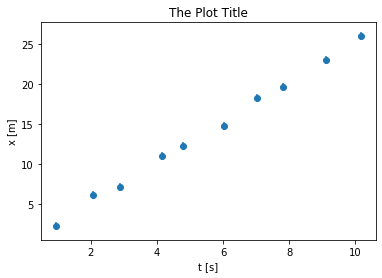

In [3]:
plt.errorbar(t,x,xerr=None,yerr=xuncertainty,linestyle="",marker="o",label="Data")
plt.title("The Plot Title")
plt.xlabel("t [s]")
plt.ylabel("x [m]")

It's hard to see the errorbars, so maybe we can change the dot style:

Text(0, 0.5, 'x [m]')

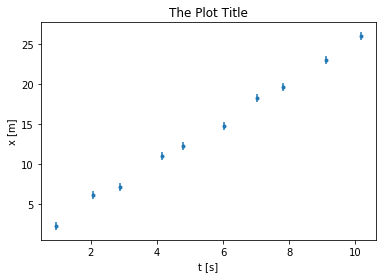

In [4]:
plt.errorbar(t,x,xerr=None,yerr=xuncertainty,linestyle="",marker=".",label="Data")
plt.title("The Plot Title")
plt.xlabel("t [s]")
plt.ylabel("x [m]")

It looks like a straight line, so we can try to fit it. My code has a fit function for this.

In [5]:
slope, intercept, slopeerror, intercepterror, xerr = linear_fit(t,x)

################################################################################
Linear Fit Results for 10 Data Points
slope estimate:                   2.5077 +/-    0.04593
intercept estimate:              0.22636 +/-     0.2857
y point uncertainty estimate:     0.4216   +0.16226    -0.074993  
r^2:                             0.99732
################################################################################


This is similar to doing a linear fit in Excel. It prints out, and sets to those variables, the best fit slope, intercept, each of their uncertainties, and and estimate uncertainty on the y coordinate measurements (it assumes they all have the same uncertainty).

In the printout, the uncertainty on the uncertainty estimate is given. It's asymmetric.

We can check if our expected uncertainty on our distance variable is within the range the fit spits out. Our expectation, 0.5 m, is within the uncertainty region the fit prints out (0.42 +0.16 - 0.07) m, so that means we probably estimated the uncertainty properly.

The slope of the line is an estimate of the speed. (2.51 +/- 0.05) m/s doesn't match well with our expectation of (4.0 +/- 0.5) m/s.

We should check that the fit worked by plotting the fitted line with the data. The function linspace below just generates an evenly spaced set of points. It's good for using as the domain/independent variable of a function you want to plot.

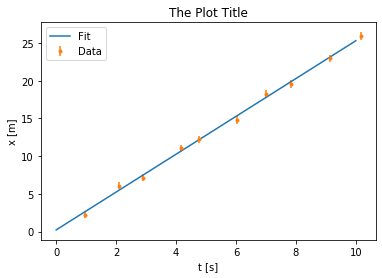

In [6]:
xdomainvar = np.linspace(0,10) # make evenly spaced points between 0 and 10
plt.plot(xdomainvar,slope*xdomainvar+intercept,label="Fit")
plt.errorbar(t,x,xerr=None,yerr=xuncertainty,linestyle="",marker=".",label="Data")
plt.title("The Plot Title")
plt.xlabel("t [s]")
plt.ylabel("x [m]")
plt.legend()

The fit looks really good. The problem probably isn't with the fit. If the fit function produces massive uncertainties, that can be another sign of a bad fit, but that doesn't seem to be the case here.

Lets make a graph comparing our result with the expected one. The compare_results function does that.

The first argument is a list of titles for the expereimental results. The second is a list of result values. The third is a list of result error values. The fourth is the expected value, The fifth is the expected uncertainty value (None if no uncertainty). The Sixth is the label for these values. The Seventh is where to save an image for this plot, so you can put the image in your report easier.

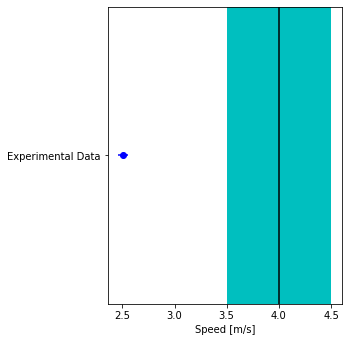

In [7]:
compare_results(["Experimental Data"],[slope],[slopeerror],expected_speed,expected_speed_uncertainty,"Speed [m/s]","tutorial_results_plot.png")

The line shows the expected result, and the cyan band shows the uncertainty. The points show your and other's measurements you want to plot. You can see here that the data doesn't overlap with the expectation. That means there was either an error in the experiment or expectation. An error in an expectation can mean a new discovery! Unfortunately, that's rare in Advanced Lab.

Here is another example, comparing data from multiple experiments to a result with no uncertainty.

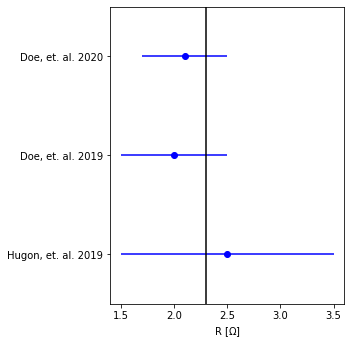

In [9]:
compare_results(["Hugon, et. al. 2019","Doe, et. al. 2019","Doe, et. al. 2020"],[2.5, 2.0, 2.1],[1.,0.5,0.4],2.3,None,"R [$\Omega$]","tutorial_results_plot2.png")